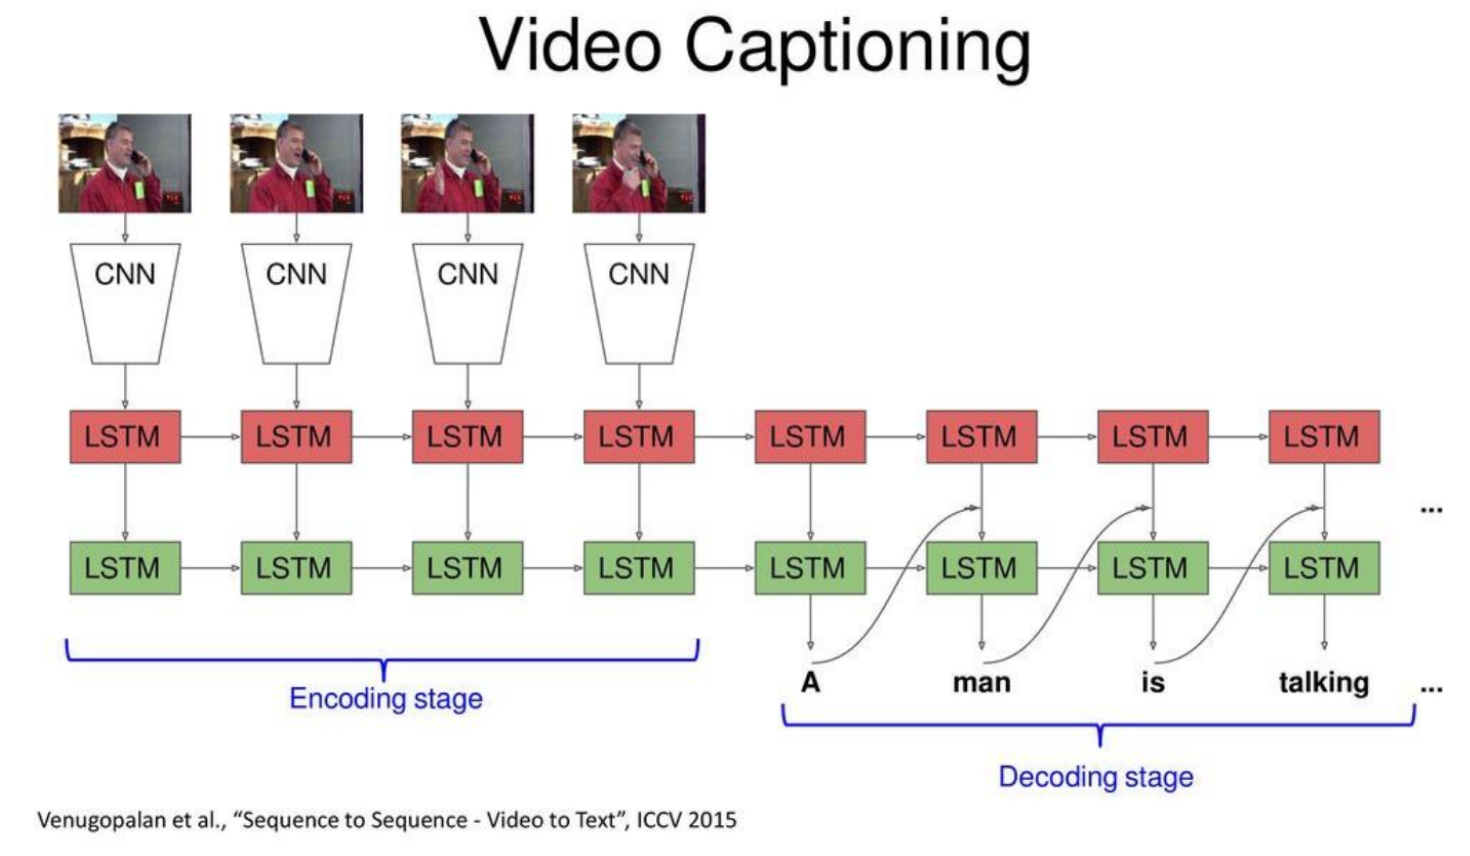

In [12]:
import numpy as np
from tensorflow import keras
from keras.layers import Conv2D, TimeDistributed, MaxPooling2D, Flatten, Dropout, LSTM, Dense, RepeatVector, Input
from keras.models import Sequential, Model

model = Sequential()
model.add(TimeDistributed(Conv2D(32, (5, 5), activation='relu'), input_shape=(100, 200, 200, 3)))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))

model.add(TimeDistributed(Conv2D(128, (4,4), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Flatten()))

################

sh = model.layers[4].output_shape
encoder_inputs = Input(shape=( sh[1], sh[2]))
encoder_l1 = LSTM(50,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = LSTM(50, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]


decoder_inputs = RepeatVector(sh[2])(encoder_outputs2[0])


decoder_l1 = LSTM(50, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = LSTM(50, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = TimeDistributed(Dense(sh[2]))(decoder_l2)

model_e2d2 = Model(encoder_inputs,decoder_outputs2)
#
model.add(model_e2d2)
model.summary()
model_e2d2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_57 (TimeDis (None, 100, 196, 196, 32) 2432      
_________________________________________________________________
time_distributed_58 (TimeDis (None, 100, 195, 195, 32) 0         
_________________________________________________________________
time_distributed_59 (TimeDis (None, 100, 192, 192, 128 65664     
_________________________________________________________________
time_distributed_60 (TimeDis (None, 100, 96, 96, 128)  0         
_________________________________________________________________
time_distributed_61 (TimeDis (None, 100, 1179648)      0         
_________________________________________________________________
model_6 (Functional)         (None, 1179648, 1179648)  296162448 
Total params: 296,230,544
Trainable params: 296,230,544
Non-trainable params: 0
_______________________________________

In [ ]:
https://stackoverflow.com/questions/43034960/many-to-one-and-many-to-many-lstm-examples-in-keras

https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/

https://www.analyticsvidhya.com/blog/2020/10/multivariate-multi-step-time-series-forecasting-using-stacked-lstm-sequence-to-sequence-autoencoder-in-tensorflow-2-0-keras/


#Wrong intial answer. this is wrong!

In [14]:
import numpy as np
from tensorflow import keras
from keras.layers import Conv2D, TimeDistributed, MaxPooling2D, Flatten, Dropout, LSTM, Dense
from keras.models import Sequential

model = Sequential()
model.add(TimeDistributed(Conv2D(32, (5, 5), activation='relu'), input_shape=(100, 200, 200, 3)))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))

model.add(TimeDistributed(Conv2D(128, (4,4), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Flatten()))

# input to LSTM
#print(model.layers[4].output_shape)

L1 = LSTM(50, return_sequences=True, input_shape=model.layers[4].output_shape)
model.add(L1)

L2 = LSTM(50, return_sequences=True, input_shape=model.layers[5].output_shape)
model.add(L2)

L3 = LSTM(50, return_sequences=True,  input_shape=model.layers[6].output_shape)
model.add(L3)

L4 = LSTM(50, return_sequences=True,  input_shape=model.layers[7].output_shape)
model.add(L4)

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_63 (TimeDis (None, 100, 196, 196, 32) 2432      
_________________________________________________________________
time_distributed_64 (TimeDis (None, 100, 195, 195, 32) 0         
_________________________________________________________________
time_distributed_65 (TimeDis (None, 100, 192, 192, 128 65664     
_________________________________________________________________
time_distributed_66 (TimeDis (None, 100, 96, 96, 128)  0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, 100, 1179648)      0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 100, 50)           235939800 
_________________________________________________________________
lstm_45 (LSTM)               (None, 100, 50)         